In [1]:
import gurobipy as gb
from gurobipy import GRB
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import os
import math
import random
from itertools import combinations, chain

In [2]:
class args:
    filename = None
    scale = 40
    figsize = (6,6)
    
def DrawInitG(G, withedges=False):
    
    plt.figure(figsize=args.figsize)
    
    pos = {i:(G.nodes[i]['x'], G.nodes[i]['y']) for i in G.nodes()}
    
    nx.draw_networkx_nodes(G, 
                           pos=pos, 
                           node_shape='o', 
                           node_size=600,
                           node_color='red')
    
    nx.draw_networkx_labels(G, pos=pos, font_color='w', font_size=12)
    
    if withedges:
        nx.draw_networkx_edges(G,pos=pos, alpha=1.0)
        labels = {(i,j):G.get_edge_data(i,j,'cost').get('cost') for i,j in G.edges()}
        nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels)
    
    plt.axis('off')
    plt.show()
    
def DrawSol(G, x):
    
    plt.figure(figsize=args.figsize)
    
    pos = {i:(G.nodes[i]['x'], G.nodes[i]['y']) for i in G.nodes()}

    
    nx.draw_networkx_nodes(G, 
                           pos=pos, 
                           node_shape='o', 
                           node_size=600,
                           node_color='red',
                           label=[G.nodes()])
    
    nx.draw_networkx_labels(G, pos=pos, font_color='w', font_size=12)
    
    for u,v in G.edges():
        if x[u,v].x > 0.01 and x[u,v].x < 0.9:
            nx.draw_networkx_edges(G, pos=pos,
                                   edgelist=[(u,v)],
                                   edge_color='r')
            
            nx.draw_networkx_edge_labels(G, pos=pos,
                                         edge_labels={(u,v):'{:.2f}'.format(x[u,v].x)})
        
        if x[u,v].x > 0.9:
            nx.draw_networkx_edges(G, pos=pos,
                                   edgelist=[(u,v)],
                                   edge_color='k')
        

    
    #edges_in_sol = [(u,v)  for u,v in G.edges() if x[u,v].x > 0.1]

    
    plt.axis('off')
    plt.show()
    
def DrawSolZ(G, x):
    
    plt.figure(figsize=args.figsize)
    
    pos = {i:(G.nodes[i]['x'], G.nodes[i]['y']) for i in G.nodes()}

    
    nx.draw_networkx_nodes(G, 
                           pos=pos, 
                           node_shape='o', 
                           node_size=600,
                           node_color='red',
                           label=[G.nodes()])
    
    nx.draw_networkx_labels(G, pos=pos, font_color='w', font_size=12)
    
    for u,v in G.edges():
        if x[u,v].x > 0.01 and x[u,v].x < 0.9:
            nx.draw_networkx_edges(G, pos=pos,
                                   edgelist=[(u,v)],
                                   edge_color='k')
            
            nx.draw_networkx_edge_labels(G, pos=pos,
                                         edge_labels={(u,v):'{:.2f}'.format(x[u,v].x)})
        
        if x[u,v].x > 0.9:
            nx.draw_networkx_edges(G, pos=pos,
                                   edgelist=[(u,v)],
                                   edge_color='r')
        

    
    #edges_in_sol = [(u,v)  for u,v in G.edges() if x[u,v].x > 0.1]

    
    plt.axis('off')
    plt.show()   
    
def DrawSolX1(G, x):
    plt.figure(figsize=args.figsize)
    
    pos = {i:(G.nodes[i]['x'], G.nodes[i]['y']) for i in G.nodes()}

    
    nx.draw_networkx_nodes(G, 
                           pos=pos, 
                           node_shape='o', 
                           node_size=600,
                           node_color='red',
                           label=[G.nodes()])
    
    nx.draw_networkx_labels(G, pos=pos, font_color='w', font_size=12)
    
    for m,n in G.edges():
                    if x[m,n,1].x > 0.9:
                        nx.draw_networkx_edges(G, pos=pos,
                                              edgelist=[(m,n)],
                                               edge_color='red')
        
    plt.axis('off')
    plt.show()    
    
    
def DrawSolX2(G, x):
    plt.figure(figsize=args.figsize)
    
    pos = {i:(G.nodes[i]['x'], G.nodes[i]['y']) for i in G.nodes()}

    
    nx.draw_networkx_nodes(G, 
                           pos=pos, 
                           node_shape='o', 
                           node_size=600,
                           node_color='red',
                           label=[G.nodes()])
    
    nx.draw_networkx_labels(G, pos=pos, font_color='w', font_size=12)
    
    for m,n in G.edges():
                    if x[m,n,2].x > 0.9:
                        nx.draw_networkx_edges(G, pos=pos,
                                              edgelist=[(m,n)],
                                               edge_color='blue')
        
    plt.axis('off')
    plt.show()    
    
def DrawSolX3(G, x):
    plt.figure(figsize=args.figsize)
    
    pos = {i:(G.nodes[i]['x'], G.nodes[i]['y']) for i in G.nodes()}

    
    nx.draw_networkx_nodes(G, 
                           pos=pos, 
                           node_shape='o', 
                           node_size=600,
                           node_color='red',
                           label=[G.nodes()])
    
    nx.draw_networkx_labels(G, pos=pos, font_color='w', font_size=12)
    
    for m,n in G.edges():
                    if x[m,n,3].x > 0.9:
                        nx.draw_networkx_edges(G, pos=pos,
                                              edgelist=[(m,n)],
                                               edge_color='green')
        
    plt.axis('off')
    plt.show()    

def DrawSolX4(G, x):
    plt.figure(figsize=args.figsize)
    
    pos = {i:(G.nodes[i]['x'], G.nodes[i]['y']) for i in G.nodes()}

    
    nx.draw_networkx_nodes(G, 
                           pos=pos, 
                           node_shape='o', 
                           node_size=600,
                           node_color='red',
                           label=[G.nodes()])
    
    nx.draw_networkx_labels(G, pos=pos, font_color='w', font_size=12)
    
    for m,n in G.edges():
                    if x[m,n,4].x > 0.9:
                        nx.draw_networkx_edges(G, pos=pos,
                                              edgelist=[(m,n)],
                                               edge_color='purple')
        
    plt.axis('off')
    plt.show()    



    
    #edges_in_sol = [(u,v)  for u,v in G.edges() if x[u,v].x > 0.1]

    
    plt.axis('off')
    plt.show()    
    
def DrawSolQ(G, x , u):
    
    plt.figure(figsize=args.figsize)
    
    pos = {i:(G.nodes[i]['x'], G.nodes[i]['y']) for i in G.nodes()}

    
    nx.draw_networkx_nodes(G, 
                           pos=pos, 
                           node_shape='o', 
                           node_size=600,
                           node_color='red',
                           label=[G.nodes()])
    
    nx.draw_networkx_labels(G, pos=pos, font_color='w', font_size=12)
    
    for m,n in G.edges():
        for k in listk:
                if x[m,n,k,u].x > 0.9 and x[m,n,k,u].x < 1.5:
                    nx.draw_networkx_edges(G, pos=pos,
                                           edgelist=[(m,n)],
                                           edge_color='red')
                if x[m,n,k,u].x > 1.5 and x[m,n,k,u].x < 2.5:
                    nx.draw_networkx_edges(G, pos=pos,
                                           edgelist=[(m,n)],
                                           edge_color='blue')
                if x[m,n,k,u].x > 2.5 and x[m,n,k,u].x < 3.5:
                    nx.draw_networkx_edges(G, pos=pos,
                                           edgelist=[(m,n)],
                                           edge_color='orange')

    
    #edges_in_sol = [(u,v)  for u,v in G.edges() if x[u,v].x > 0.1]

    
    plt.axis('off')
    plt.show()    


In [3]:
class args:
    filename = None
    scale = 15
    figsize = (10,10)
    
def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

In [4]:
### Autogenerated Graph
def create_random_graph(size, complete = 1): 
    if complete: 
        G = nx.complete_graph( size)
        nx.set_node_attributes(G, dict(list(enumerate([random.randint(1,60) for i in G.nodes()]))), "x") 
        nx.set_node_attributes(G, dict(list(enumerate([random.randint(1,60) for i in G.nodes()]))), "y") 
        nx.set_node_attributes(G, dict(list(enumerate([random.randint(1,40) for i in G.nodes()]))), "d") 
        for (i,j) in G.edges(): 
            G[i][j]["cost"] = random.randint(5,30)
            G[i][j]["time"] = random.randint(15,30)
            G[i][j]["reward"] = random.randint(0,30)

        return G
    return None

This is the graph G with only. E arch


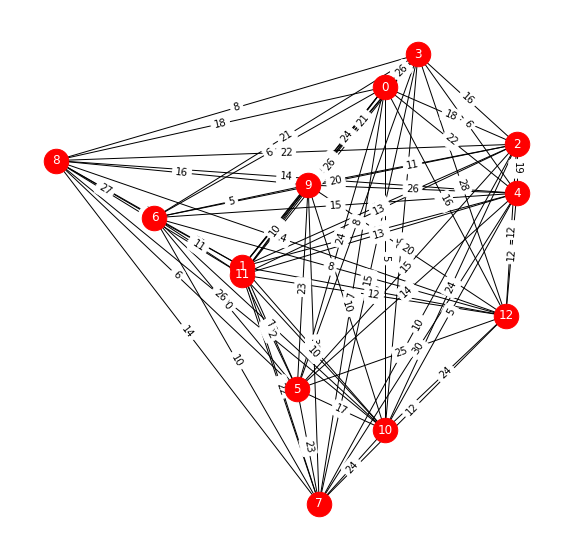

This is the graph G with only. A arch


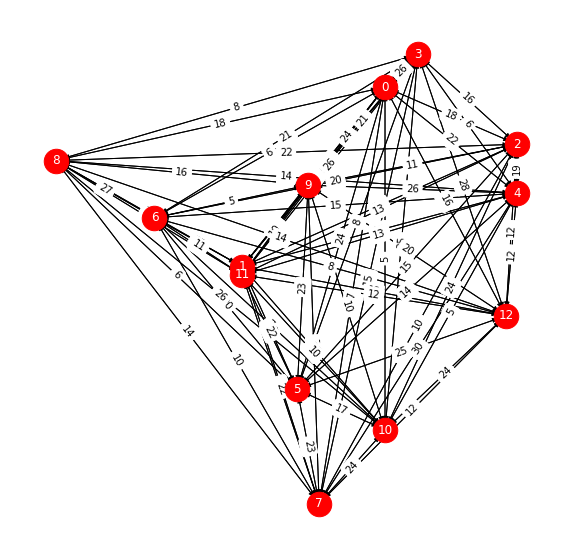

G has 13 nodes and 78 edges


In [5]:
random.seed(12)
G = create_random_graph(13)

A = G.to_directed()
print("This is the graph G with only. E arch")
DrawInitG(G, withedges=True)
print("This is the graph G with only. A arch")
DrawInitG(A, withedges=True)

# Constraints and settings
#Budget
B = 1000
#Time
T = 200
#s and t 
s = 1
t = 6
# List k
listk = (0,1,2,3)
# Commodities
users = (1,2,3,4)
#Data
print ("G has", G.number_of_nodes(), "nodes and", G.number_of_edges(), "edges")

In [6]:
mop = gb.Model()

Set parameter Username
Academic license - for non-commercial use only - expires 2022-07-26


# A MILP Model

>**Given**
>A mixed graph $G=(N, E \bigcup A)\;$ where $N$ models the set of intersections and $E$ models the set of tracks connecting two adjacent intersections $(i,j)\in N , i < j$, while each arc in $A = ${$(i,j)(j,i) \forall [i,j] \in E$}
For each arc, traveling time $t_{i,j} > 0$ is known and the total travel time of an itinerary cannot exceed a threshold T. The reconditioning of edge [$i,j$] costs $c_{i,j} \geq 0 $ and the budget of the entire structure is B.
>
>**Find**
> The maximation of the marginal attractivenness collected by each user at each edge and node along the chosen itinerary at each $k^{th}$ traversal

### Formulation

Formulation:
$$
\begin{alignat}{1}\\
\max \sum_{u \in U}\sum_{k=1}^{\bar k}(\sum_{(i,j) \in A}a^{ku}_{ij} \chi^{ku}_{ij} &+ \sum_{(i) \in N}d^{ku}_{i} \gamma^{ku}_{i}) &\\ 
\sum_{(i,j) \in FS(i)} x_{ij}^u - \sum_{(h,i) \in BS(i)} x_{hi}^u  &= b_{i} \;\; &\forall i \in N , \forall u \in U &(2) \\
\sum_{(i,j) \in A} t_{ij} x^{u}_{ij} &= T \;\; &\forall u \in U &(3)  &\\
x^{u}_{ij} + x^{u}_{ji} &= \sum_{k \in K}\chi^{ku}_{ij} \;\; &\forall [i,j] \in E , \forall u \in U &(4) \\ 
\chi^{ku}_{ij} &\le \chi^{k-1,u}_{ij} \;\; &\forall [i,j] \in E , \forall u \in U , k=2,...,\bar k &(5) \\ 
z_{ij} &\ge \chi^{1,u}_{ij} \;\; &\forall [i,j] \in E , \forall u \in U \;\; &(6)\\
\sum_{(i,j) \in A:i<j} c_{ij} z_{ij} &\le B & &(7)\\
\sum_{(h,i) \in BS(i)} x^u_{hi} &= \sum_{k \in K} \gamma^{ku}_i \;\; &\forall i \in N , i \ne s, \forall u \in U \;\; &(8) \\
\sum_{(s,i) \in FS(s)} x^u_{si} &= \sum_{k \in K} \gamma^{ku}_s \;\; &\forall u \in U \;\; &(9) \\
\gamma^{ku}_i &\le \gamma^{k-1,u}_i \;\; &\forall i \in N , \forall u \in U, \forall k \in K \;\; &(10) \\
\gamma^{1u}_i &\ge \sum_{[i,j]\in E: i \in N^{st}, j \notin N^st} \chi^{1u}_{ij} \;\; &\forall v \in N^{st},\forall N^{st} \subset N, \forall u \in U \;\; &(11) \\
z_{ij} & \in \{0,1\} \;\; &\forall i,j \in E  \;\; \\
x^u_{ij} & \in Z^+ \;\; &\forall i,j \in E,\forall u \in U, \forall k \in K \;\; \\
\chi^{ku}_{ij} & \in \{0,1\} \;\; &\forall i,j \in E,\forall u \in U, \forall k \in K \;\; \\
\gamma^{ku}_{i} & \in \{0,1\} \;\; &\forall i \in N,\forall u \in U, \forall k \in K \;\; \\
\end{alignat}
$$

### Decision Variables

In [7]:
z = mop.addVars(G.edges(), \
                         vtype=gb.GRB.BINARY, \
                         name='z')

In [8]:
x = mop.addVars(A.edges(), \
                         users, \
                         vtype=gb.GRB.INTEGER, \
                         lb=0.0, \
                         name='x')

In [9]:
#### CHI ####
q = mop.addVars(G.edges(), \
                         listk, \
                         users, \
                         vtype=gb.GRB.BINARY, \
                         lb=0.0, \
                         name='q')

In [10]:
#### GAMMA ####
y = mop.addVars(G.nodes(), \
                         listk, \
                         users, \
                         vtype=gb.GRB.BINARY, \
                         lb=0.0, \
                         name='y')

### Constraints Formulation

#### Objective Function

In [11]:
mop.setObjective(sum(sum(sum(G[i][j]["reward"] * q[i,j,k,u] for (i,j) in A.edges() if i < j) + sum(G.nodes[n]["d"] * y[n,k,u] for n in G.nodes()) for k in range(len(listk))) for u in users) , GRB.MAXIMIZE)
mop.update()

##### Constraint (2)

In [12]:
for i in A.nodes():
    for u in users:
        name = "Balance_(%d,%d)"%(i,u)
        if i == s:
            mop.addConstr(x.sum(i,'*',u ) == 1, name)
            mop.addConstr(x.sum('*',i ,u ) == 0, "No_Arch_in_S(%d)"%u)
        elif i == t:
            mop.addConstr(x.sum('*',i ,u) == 1, name)
            mop.addConstr(x.sum(i,'*',u ) == 0, "No_Arch_out_T(%d)"%u)
        else:
            mop.addConstr(x.sum(i,'*',u ) - x.sum('*',i ,u) == 0, name)
mop.update()

#### Constrain (3) Time constraint

In [13]:
for u in users:
            name = "Vincolo_Tempo_Commodities(%d)"%(u)
            mop.addConstr(sum(A[i][j]["time"] * x[i,j,u]  for i,j in A.edges() ) <= T, name)
mop.update() 


#### Constrain (4) 

In [14]:
for (i,j) in G.edges():
    for u in users:
        name = "Equality_x_(%d,%d,%d)"%(i,j,u)
        mop.addConstr(x[i,j,u] + x[j,i,u] == sum(q[i,j,k,u] for k in listk), name)
mop.update()

#### Constrain (5)

In [15]:
for i,j in G.edges():
    for u in users:
        for k in range(1,len(listk)):
            name = "Chi(%d,%d,%d,%d)"%(i,j,k,u)
            mop.addConstr(q[i,j,k,u] <= q[i,j,k-1,u],name)
mop.update()

#### Constrain (6)

In [16]:
for i,j in G.edges():
    for u in users:
        name="Z_Constraint(%d,%d,%d)"%(i,j,u)
        mop.addConstr(z[i,j] >= sum(q[i,j,k,u] for k in range(1,len(listk))),name)

#### Constrain (7)

In [17]:
costs ={(i,j): G[i][j]['cost'] for (i,j) in A.edges()}
mop.addConstr(z.prod(costs) <= B,"budget")
mop.update() 

#### Constrain(8)

In [18]:
for i in G.nodes():
    if i != s:
        for u in users:
            name = "C8_(%d,%d)"%(i,u)
            mop.addConstr(x.sum('*', i ,u) == sum(y[i,k,u] for k in listk),name)
            
mop.update()

#### Constrain(9)

In [19]:
for u in users:    
    name = "C9_(%d)"%(u)
    mop.addConstr(x.sum(s , '*' ,u) == sum(y[s,k,u] for k in listk),name)
            
mop.update()

#### Constraint (10)

In [20]:
for i in G.nodes():
    for k in range(1,len(listk)):
        for u in users:
            name = "C10_(%d,%d,%d)"%(i,k,u)
            mop.addConstr(y[i,k,u] <= y[i,k-1,u],name)
mop.update()

#### Constraint (11)

In [21]:
count=0

for l in powerset(G.nodes):
    if s in l and t in l:
        for i in l: 
            for u in users:
                name = "Nst_(%d)"%(count)
                mop.addConstr(y[i,k,u] >= sum(q[i,j,k,u] for i,j in G.edges() for k in range(1,len(listk)) if j not in l),name)
                count += 1
                
mop.update()
mop.write("mop.lp")

### Optimization and results

In [22]:
mop.optimize()

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[rosetta2])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 63273 rows, 2158 columns and 6176662 nonzeros
Model fingerprint: 0xa0b3ff55
Variable types: 0 continuous, 2158 integer (1534 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [1e+00, 4e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+03]
Found heuristic solution: objective 136.0000000
Presolve removed 28732 rows and 184 columns (presolve time = 5s) ...
Presolve removed 63160 rows and 1981 columns
Presolve time: 7.29s
Presolved: 113 rows, 177 columns, 729 nonzeros
Found heuristic solution: objective 1522.0000000
Variable types: 0 continuous, 177 integer (177 binary)

Root simplex log...

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.0986667e+03   3.513333e+02   0.000000e+00      7s
      72    2.0106875e+03   0.000000e+00   0.000000e+00     

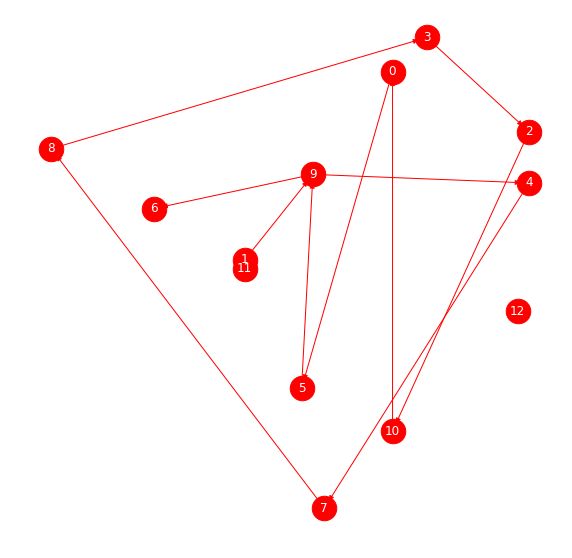

In [23]:
DrawSolX1(A,x)

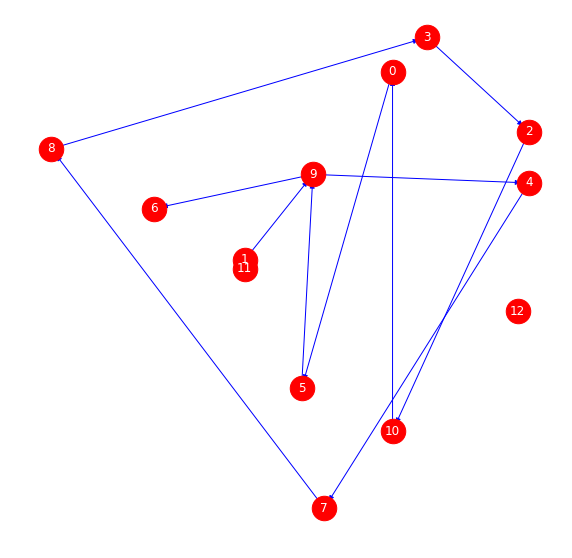

In [24]:
DrawSolX2(A,x)

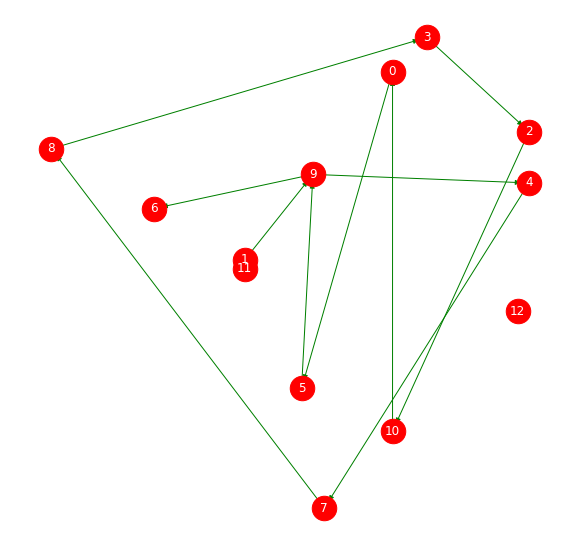

In [25]:
DrawSolX3(A,x)

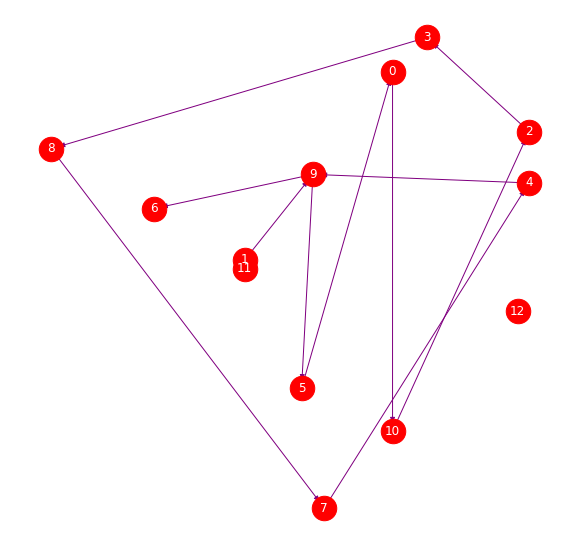

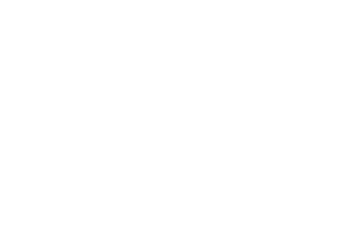

In [26]:
DrawSolX4(A,x)

In [27]:
if mop.status == GRB.OPTIMAL:
    mop.printAttr('X')


    Variable            X 
-------------------------
    x[0,5,1]            1 
    x[0,5,2]            1 
    x[0,5,3]            1 
   x[0,10,4]            1 
    x[1,9,1]            1 
    x[1,9,2]            1 
    x[1,9,3]            1 
    x[1,9,4]            1 
    x[2,3,4]            1 
   x[2,10,1]            1 
   x[2,10,2]            1 
   x[2,10,3]            1 
    x[3,2,1]            1 
    x[3,2,2]            1 
    x[3,2,3]            1 
    x[3,8,4]            1 
    x[4,7,1]            1 
    x[4,7,2]            1 
    x[4,7,3]            1 
    x[4,9,4]            1 
    x[5,0,4]            1 
    x[5,9,1]            1 
    x[5,9,2]            1 
    x[5,9,3]            1 
    x[7,4,4]            1 
    x[7,8,1]            1 
    x[7,8,2]            1 
    x[7,8,3]            1 
    x[8,3,1]            1 
    x[8,3,2]            1 
    x[8,3,3]            1 
    x[8,7,4]            1 
    x[9,4,1]            1 
    x[9,4,2]            1 
    x[9,4,3]            1 
 

### Nota
Dalla printAttr nella cella precedente possiamo notare che il grafo risultato cambia in base a u si può notare che nella u = 4 c'è arco 2->3 mentre nelle altre c'è 3->2 e ulteriori differenze che rendono i path diversi. Su un vincolo di tempo più stringente tali differenze sono minime se non nulle e quindi aumentato allargando il vincolo tempo.

### Experiment Summary

| #Experiment | graph                    | Num of nodes | Num of edges | Budget     | Time      |   (s,t)   | Execution time | Obj Val      |
|:-----------:|--------------------------|--------------|--------------|------------|-----------|-----------|----------------|--------------|
| 1           | RANDOM(SIZE=6)           | 6            | 15           | 60         | 40        |   2 , 5   | 0.01 s         | 236          |
| 2           | RANDOM(SIZE=9,SEED=40)   | 9            | 36           | 60         | 40        |   2 , 5   | 0.03 s         | 508          |
| 3           | RANDOM(SIZE=9,SEED=40)   | 9            | 36           | 60         | 40        |   1 , 7   | 0.05 s         | 300          |
| 4           | RANDOM(SIZE=9,SEED=40)   | 9            | 36           | 80         | 80        |   1 , 7   | 0.06 s         | 812          |
| 5           | RANDOM(SIZE=9,SEED=40)   | 9            | 36           | 80         | 100       |   1 , 7   | 0.06 s         | 1028         |
| 6           | RANDOM(SIZE=13,SEED=12)  |13            | 78           | 80         | 100       |   3 , 11  | 3.43 s         | 1152         |
| 7           | RANDOM(SIZE=13,SEED=12)  |13            | 78           | 90         | 80        |   3 , 11  | 3.60 s         | 852          |
| 8           | RANDOM(SIZE=13,SEED=12)  |13            | 78           | 100        | 120       |   3 , 11  | 3.36 s         | 1336         |
| 9           | RANDOM(SIZE=13,SEED=12)  |13            | 78           | 1000       | 1000      |   3 , 11  | 3.41 s         | 7540         |
| 10          | RANDOM(SIZE=16        )  |16            | 120          | 1000       | 500       |   5 , 15  | 470.19 s         | 5080         |